## **Download the dataset**
### Downloaded the modis satellite data set and filtered the latitude and longitude to limit it to Alberta

In [1]:
import pandas as pd

df = pd.read_csv('modis_2023_Canada.csv')

ab_df = df[
    (df['latitude'] >= 48.9) & (df['latitude'] <= 60.0) &
    (df['longitude'] >= -120.0) & (df['longitude'] <= -110.0) &
    (df['type'] == 0)
]

ab_df.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,53.4971,-117.9781,375.0,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,265.7,0.0,D,0
1,53.4998,-117.9604,361.8,1.5,1.2,2023-01-02,1915,Terra,MODIS,91,61.03,267.0,0.0,D,0
2,53.4929,-117.9582,377.4,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,266.3,0.0,D,0
3,53.4950,-117.9712,374.5,1.0,1.0,2023-01-02,2048,Aqua,MODIS,100,61.03,267.7,0.0,D,0
4,56.7794,-118.0159,314.9,1.3,1.1,2023-01-03,450,Terra,MODIS,87,61.03,266.6,28.1,N,0


In [2]:
df.shape

(324003, 15)

In [3]:
ab_df.shape

(88040, 15)

In [4]:
ab_df.to_csv('wildfires_alberta_only.csv', index=False)

## **Data cleaning and Preprocessing**
1. Dropped the missing values and defined the features and the target.
2. Did a train-test split, then preprocessed the data by scaling the features.
3. Made a pipeline and used RandomForestClassifier.
4. Ran a cross-validation and fit the best scores
5. Printed a classification report


In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

ab_df = ab_df.dropna()

# Features and target
features = ['latitude', 'longitude', 'brightness', 'scan', 'track', 'bright_t31', 'frp']
X = ab_df[features]
y = ab_df['confidence']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),               # Scaling
    ('model', RandomForestClassifier())         # Classifier
])

# Cross-validation scores
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f}")

# Fit the model
pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = pipeline.predict(X_test)

# Evaluate
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Cross-validation accuracy scores: [0.34648967 0.3536594  0.34949595 0.34175777 0.34601732]
Mean CV accuracy: 0.3475

Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.31      0.27       498
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        16
           6       0.12      0.06      0.08        16
           7       0.00      0.00      0.00        16
           8       0.07      0.05      0.06        19
           9       0.06      0.07      0.06        14
          10       0.04      0.05      0.04        22
          11       0.00      0.00      0.00        28
          12       0.06      0.03      0.03        40
          13       0.00      0.00      0.00        21
          14       0.03      0.02      0.03      

## **Visualising correlations**

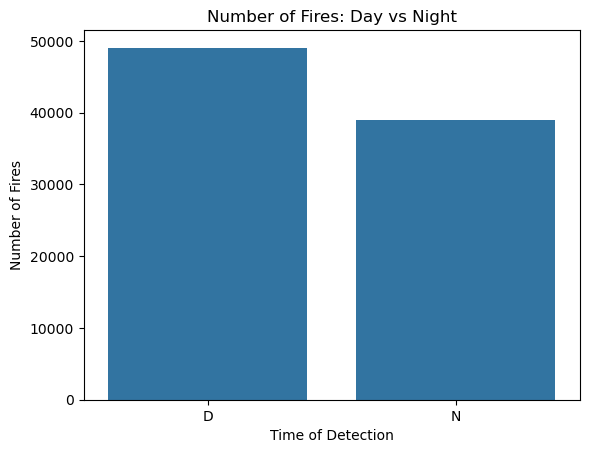

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=ab_df, x='daynight')
plt.title('Number of Fires: Day vs Night')
plt.xlabel('Time of Detection')
plt.ylabel('Number of Fires')
plt.show()


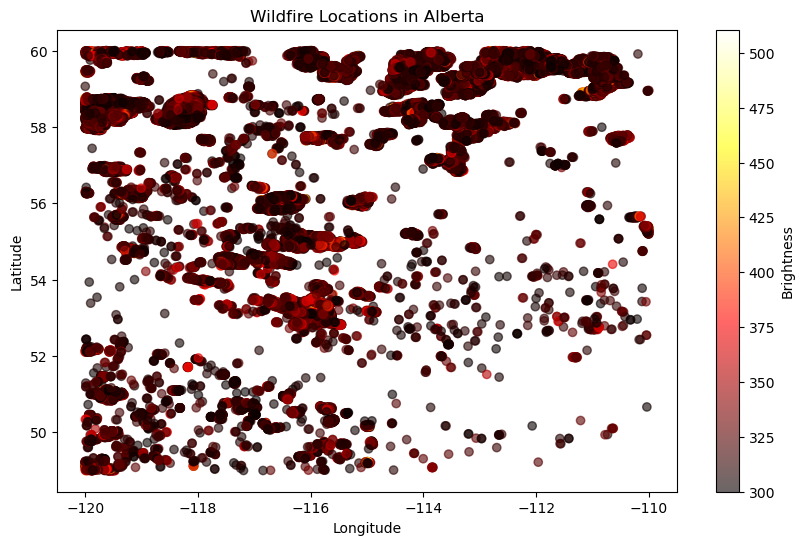

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(ab_df['longitude'], ab_df['latitude'], c=df['brightness'], cmap='hot', alpha=0.6)
plt.colorbar(label='Brightness')
plt.title('Wildfire Locations in Alberta')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

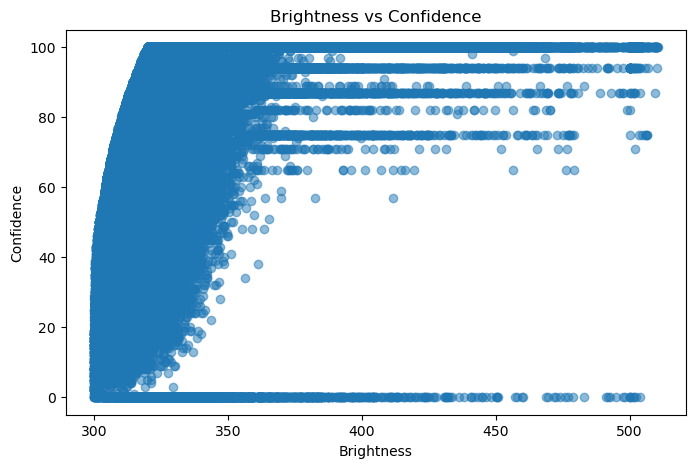

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(ab_df['brightness'], ab_df['confidence'], alpha=0.5)
plt.title('Brightness vs Confidence')
plt.xlabel('Brightness')
plt.ylabel('Confidence')
plt.show()

## **Labeling cities based on their geographic coordinates**

In [8]:
import pandas as pd
from geopy.distance import geodesic

cities = {
    'Airdrie': (51.2917, -114.0143),
    'Beaumont': (53.3574, -113.4154),
    'Brooks': (50.5642, -111.8989),
    'Calgary': (51.0447, -114.0719),
    'Camrose': (53.0223, -112.8355),
    'Chestermere': (51.0333, -113.8223),
    'Cold Lake': (54.4642, -110.1826),
    'Edmonton': (53.5461, -113.4938),
    'Fort Saskatchewan': (53.7126, -113.2137),
    'Grande Prairie': (55.1707, -118.7884),
    'Lacombe': (52.4681, -113.7366),
    'Leduc': (53.4609, -113.5448),
    'Lethbridge': (49.6956, -112.8450),
    'Lloydminster': (53.2781, -110.0055),
    'Medicine Hat': (50.0405, -110.6765),
    'Red Deer': (52.2681, -113.8111),
    'Spruce Grove': (53.5420, -113.9064),
    'St. Albert': (53.6305, -113.6256),
    'Wetaskiwin': (52.9695, -113.3765),
}

# Function to assign nearest city
def assign_city(row):
    fire_location = (row['latitude'], row['longitude'])
    nearest_city = min(cities.items(), key=lambda x: geodesic(fire_location, x[1]).km)[0]
    return nearest_city

# Create new column for nearest city
ab_df['nearest_city'] = ab_df.apply(assign_city, axis=1)

# Preview result
print(ab_df[['latitude', 'longitude', 'nearest_city']].head())


   latitude  longitude    nearest_city
0   53.4971  -117.9781  Grande Prairie
1   53.4998  -117.9604  Grande Prairie
2   53.4929  -117.9582  Grande Prairie
3   53.4950  -117.9712  Grande Prairie
4   56.7794  -118.0159  Grande Prairie


/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_13781/2380058195.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_df['nearest_city'] = ab_df.apply(assign_city, axis=1)


In [9]:
ab_df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,nearest_city
0,53.4971,-117.9781,375.0,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,265.7,0.0,D,0,Grande Prairie
1,53.4998,-117.9604,361.8,1.5,1.2,2023-01-02,1915,Terra,MODIS,91,61.03,267.0,0.0,D,0,Grande Prairie
2,53.4929,-117.9582,377.4,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,266.3,0.0,D,0,Grande Prairie
3,53.4950,-117.9712,374.5,1.0,1.0,2023-01-02,2048,Aqua,MODIS,100,61.03,267.7,0.0,D,0,Grande Prairie
4,56.7794,-118.0159,314.9,1.3,1.1,2023-01-03,450,Terra,MODIS,87,61.03,266.6,28.1,N,0,Grande Prairie


In [ ]:
ab_df.to_csv('wildfires_cities.csv', index=False)

## **Visualising which area are moe prone to wildfires**

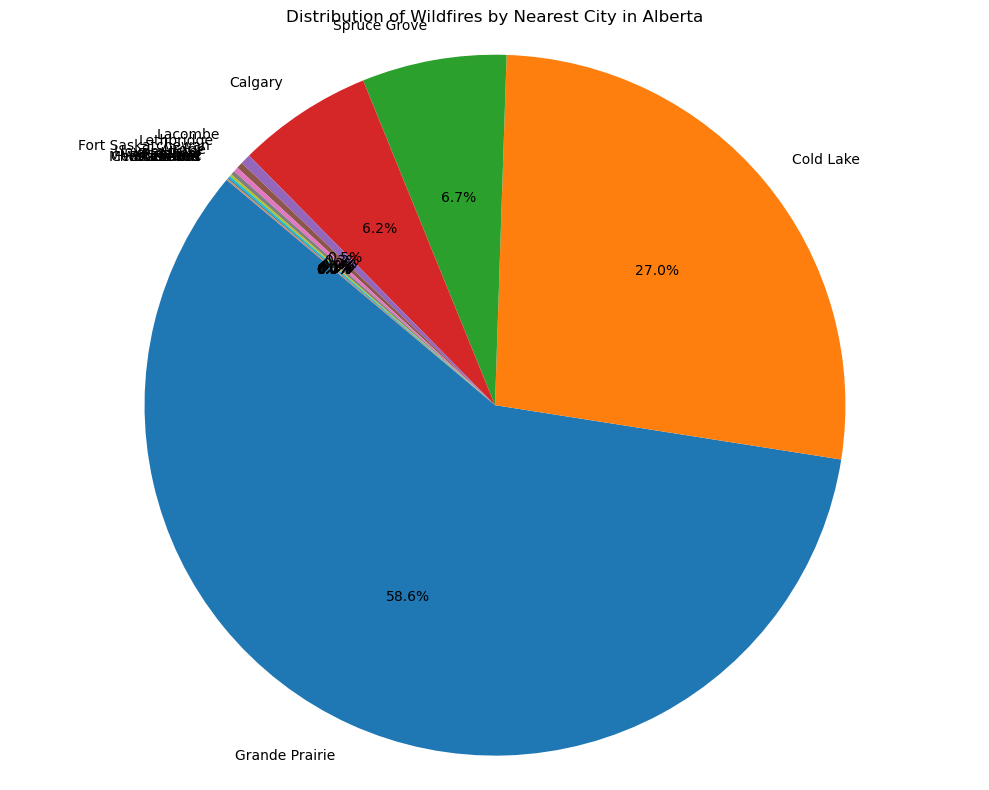

In [10]:
import matplotlib.pyplot as plt

# Count wildfires per city
city_counts = ab_df['nearest_city'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wildfires by Nearest City in Alberta')
plt.axis('equal')  # Makes the pie chart circular
plt.tight_layout()
plt.show()


## **Merging Grande Prairie data with climate data**

In [11]:
import pandas as pd

# Load your full dataset (replace this with the actual dataset loading)
# For example, you can read a CSV file
gdf = pd.read_csv('grande_prarie_may.csv')

# Ensure the 'Date/Time (LST)' column is in datetime format
gdf['Date/Time (LST)'] = pd.to_datetime(gdf['Date/Time (LST)'])

# Extract Date and Time
gdf['Date'] = gdf['Date/Time (LST)'].dt.date
gdf['Time'] = gdf['Date/Time (LST)'].dt.strftime('%H%M')

# Now you can use the 'Date' and 'Time' columns
gdf.head()


,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time (LST),Year,Month,Day,Time (LST),Flag,...,Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Date,Time
0,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-05-01 00:00:00,2023,5,1,00:00,NaN,...,NaN,92.68,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01,0000
1,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-05-01 01:00:00,2023,5,1,01:00,NaN,...,NaN,92.67,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01,0100
2,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-05-01 02:00:00,2023,5,1,02:00,NaN,...,NaN,92.69,NaN,NaN,NaN,NaN,NaN,Clear,2023-05-01,0200
3,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-05-01 03:00:00,2023,5,1,03:00,NaN,...,NaN,92.75,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01,0300
4,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-05-01 04:00:00,2023,5,1,04:00,NaN,...,NaN,92.73,NaN,NaN,NaN,NaN,NaN,NaN,2023-05-01,0400


In [14]:
import pandas as pd

# Read the CSV data into gdf
gdf = pd.read_csv('grande_prarie.csv')

# Convert 'Date/Time' in gdf to datetime
gdf['Date/Time'] = pd.to_datetime(gdf['Date/Time'])

# Convert 'acq_date' in ab_df to datetime
ab_df['acq_date'] = pd.to_datetime(ab_df['acq_date'])

# Merge the datasets based on 'Date/Time' and 'acq_date'
merged_df = pd.merge(gdf, ab_df, 
                     left_on=['Date/Time'], 
                     right_on=['acq_date'], 
                     how='inner')  # Use 'inner' join to merge matching rows

# Now, merged_df will contain the combined data from both datasets
print(merged_df.head())  # Display the first few rows of the merged data


   Longitude (x)  Latitude (y)      Station Name  Climate ID  Date/Time  Year  \
0        -118.88         55.18  GRANDE PRAIRIE A     3072921 2023-01-02  2023   
1        -118.88         55.18  GRANDE PRAIRIE A     3072921 2023-01-02  2023   
2        -118.88         55.18  GRANDE PRAIRIE A     3072921 2023-01-02  2023   
3        -118.88         55.18  GRANDE PRAIRIE A     3072921 2023-01-02  2023   
4        -118.88         55.18  GRANDE PRAIRIE A     3072921 2023-01-03  2023   

   Month  Day  Data Quality  Max Temp (°C)  ... acq_time  satellite  \
0      1    2           NaN          -10.4  ...     1915      Terra   
1      1    2           NaN          -10.4  ...     1915      Terra   
2      1    2           NaN          -10.4  ...     1915      Terra   
3      1    2           NaN          -10.4  ...     2048       Aqua   
4      1    3           NaN          -13.0  ...      450      Terra   

  instrument  confidence version  bright_t31   frp  daynight type  \
0      MODIS     

/var/folders/pd/bf6245hd6wn16vxlsjt3fr4w0000gn/T/ipykernel_13781/118597701.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_df['acq_date'] = pd.to_datetime(ab_df['acq_date'])


In [15]:
merged_df.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,nearest_city
0,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-01-02,2023,1,2,NaN,-10.4,...,1915,Terra,MODIS,100,61.03,265.7,0.0,D,0,Grande Prairie
1,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-01-02,2023,1,2,NaN,-10.4,...,1915,Terra,MODIS,91,61.03,267.0,0.0,D,0,Grande Prairie
2,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-01-02,2023,1,2,NaN,-10.4,...,1915,Terra,MODIS,100,61.03,266.3,0.0,D,0,Grande Prairie
3,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-01-02,2023,1,2,NaN,-10.4,...,2048,Aqua,MODIS,100,61.03,267.7,0.0,D,0,Grande Prairie
4,-118.88,55.18,GRANDE PRAIRIE A,3072921,2023-01-03,2023,1,3,NaN,-13.0,...,450,Terra,MODIS,87,61.03,266.6,28.1,N,0,Grande Prairie


In [5]:
import pandas as pd

# List of file names (adjust the names as needed)
file_names = ['data/jan.csv', 'data/feb.csv', 'data/mar.csv', 'data/april.csv', 'data/may.csv',
              'data/june.csv', 'data/july.csv', 'data/aug.csv', 'data/sept.csv', 'data/oct.csv',
              'data/nov.csv', 'data/dec.csv']

# List of months corresponding to each dataset
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Load all datasets into a list and add the month column
datasets = []
for i, file_name in enumerate(file_names):
    df = pd.read_csv(file_name)
    df['Month'] = months[i]  # Add the month column to each dataset
    datasets.append(df)

# Concatenate all datasets into one
combined_df = pd.concat(datasets, ignore_index=True)

# Display the first few rows of the combined dataset
combined_df.head()


,Long,Lat,Stn_Name,Clim_ID,Prov_or_Ter,Tm,DwTm,D,Tx,DwTx,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Month
0,-112.967,54.283,ABEE AGDM,3010010,AB,-10.4,0.0,NaN,6.4,0.0,...,21.0,NaN,NaN,1.0,NaN,NaN,NaN,880.1,0.0,Jan
1,-111.181,53.113,ALBERT HALL AGCM,3010060,AB,-10.3,1.0,NaN,5.1,1.0,...,1.0,NaN,NaN,2.0,NaN,NaN,NaN,850.1,0.0,Jan
2,-111.779,52.315,ALLIANCE AGCM,3010162,AB,-8.0,1.0,NaN,5.5,1.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,778.9,0.0,Jan
3,-112.279,53.917,ANDREW AGDM,3010237,AB,-10.4,2.0,NaN,5.2,2.0,...,2.0,NaN,NaN,3.0,NaN,NaN,NaN,823.9,0.0,Jan
4,-111.465,52.582,BELLSHILL AGCM,3010650,AB,-8.7,2.0,NaN,4.6,2.0,...,2.0,NaN,NaN,1.0,NaN,NaN,NaN,773.4,0.0,Jan


In [6]:
combined_df.shape

(3016, 26)

In [7]:
combined_df.to_csv('climate_alberta.csv', index=False)

In [8]:
import pandas as pd

# Assuming ab_df is your dataframe

# Round latitude and longitude to 2 decimal places
ab_df['latitude'] = ab_df['latitude'].round(2)
ab_df['longitude'] = ab_df['longitude'].round(2)

# Convert 'acq_date' to datetime format
ab_df['acq_date'] = pd.to_datetime(ab_df['acq_date'])

# Extract the month from 'acq_date' and create a new 'Month' column
ab_df['Month'] = ab_df['acq_date'].dt.strftime('%b')  # %b will return the abbreviated month name (e.g., 'Jan', 'Feb', etc.)

# Display the updated dataframe
ab_df.head()


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type,Month
0,53.50,-117.98,375.0,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,265.7,0.0,D,0,Jan
1,53.50,-117.96,361.8,1.5,1.2,2023-01-02,1915,Terra,MODIS,91,61.03,267.0,0.0,D,0,Jan
2,53.49,-117.96,377.4,1.5,1.2,2023-01-02,1915,Terra,MODIS,100,61.03,266.3,0.0,D,0,Jan
3,53.50,-117.97,374.5,1.0,1.0,2023-01-02,2048,Aqua,MODIS,100,61.03,267.7,0.0,D,0,Jan
4,56.78,-118.02,314.9,1.3,1.1,2023-01-03,450,Terra,MODIS,87,61.03,266.6,28.1,N,0,Jan


In [ ]:
import pandas as pd


# Round latitude and longitude to 2 decimal places in both datasets for easier matching
ab_df['latitude'] = ab_df['latitude'].round(2)
ab_df['longitude'] = ab_df['longitude'].round(2)
combined_df['latitude'] = combined_df['Lat'].round(2)
combined_df['longitude'] = combined_df['Long'].round(2)

# Merge datasets on 'Month'
merged_df = pd.merge(combined_df, ab_df, on='Month', how='inner')

# Initialize a list to store rows with valid matches
matched_rows = []

# Set the tolerance for latitude and longitude differences
lat_tolerance = 0.5
lon_tolerance = 0.5

# Iterate through merged dataset and apply latitude and longitude tolerance
for i, row in merged_df.iterrows():
    # Extract the latitude and longitude from gdf and ab_df
    lat_gdf = row['latitude']
    lon_gdf = row['longitude']
    lat_ab = row['latitude']
    lon_ab = row['longitude']
    
    # Check if the difference in latitude and longitude is within the tolerance
    if abs(lat_gdf - lat_ab) <= lat_tolerance and abs(lon_gdf - lon_ab) <= lon_tolerance:
        matched_rows.append(row)

# Create a new DataFrame with the matched rows
final_merged_df = pd.DataFrame(matched_rows)

# Display the merged dataframe
print(final_merged_df.head())


In [15]:
import pandas as pd
import numpy as np

# Define function to create bins based on latitude and longitude with tolerance
def create_binned_coordinates(df, lat_col, lon_col, lat_tolerance=0.5, lon_tolerance=0.5):
    # Round latitude and longitude to the nearest tolerance level (0.5 degrees)
    df['lat_bin'] = np.floor(df[lat_col] / lat_tolerance) * lat_tolerance
    df['lon_bin'] = np.floor(df[lon_col] / lon_tolerance) * lon_tolerance
    return df

# Apply binning to both datasets with correct column names
combined_binned = create_binned_coordinates(combined_df, lat_col='Lat', lon_col='Long')
ab_df_binned = create_binned_coordinates(ab_df, lat_col='latitude', lon_col='longitude')

# Merge the datasets based on binned coordinates and Month
merged_df = pd.merge(combined_binned, ab_df_binned, on=['lat_bin', 'lon_bin', 'Month'], how='inner')

# Display the merged dataset
merged_df.head()


,Long,Lat,Stn_Name,Clim_ID,Prov_or_Ter,Tm,DwTm,D,Tx,DwTx,...,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-114.912,52.421,ROCKY MTN HOUSE (AUT),3015523,AB,-7.7,0.0,NaN,10.0,0.0,...,2023-01-04,1900,Terra,MODIS,0,61.03,264.9,45.5,D,0
1,-114.912,52.421,ROCKY MTN HOUSE (AUT),3015523,AB,-7.7,0.0,NaN,10.0,0.0,...,2023-01-10,1812,Terra,MODIS,0,61.03,265.3,41.1,D,0
2,-115.787,54.144,WHITECOURT A,3057376,AB,-7.3,0.0,NaN,8.7,0.0,...,2023-01-06,1843,Terra,MODIS,100,61.03,270.1,0.0,D,0
3,-115.787,54.144,WHITECOURT A,3057376,AB,-7.3,0.0,NaN,8.7,0.0,...,2023-01-07,417,Terra,MODIS,45,61.03,267.4,38.5,N,0
4,-117.867,53.350,BRULE BLACK CAT,3060903,AB,-4.5,6.0,5.7,12.0,6.0,...,2023-01-02,1915,Terra,MODIS,100,61.03,266.3,0.0,D,0


In [16]:
merged_df.shape



(5247, 43)

In [12]:
combined_binned = create_binned_coordinates(combined_df, lat_col='Lat', lon_col='Long')


In [17]:
merged_df.to_csv('merged_model_data.csv', index=False)

## Heatmaps

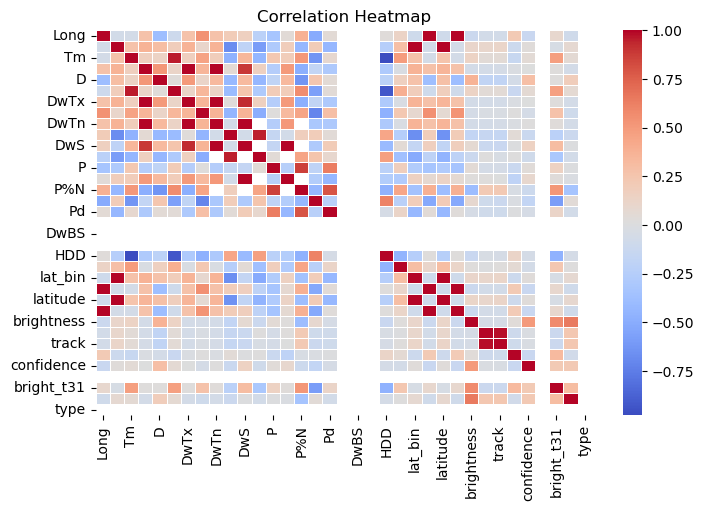

In [26]:
# Select only numeric columns
numeric_data = merged_df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap without numeric annotations
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



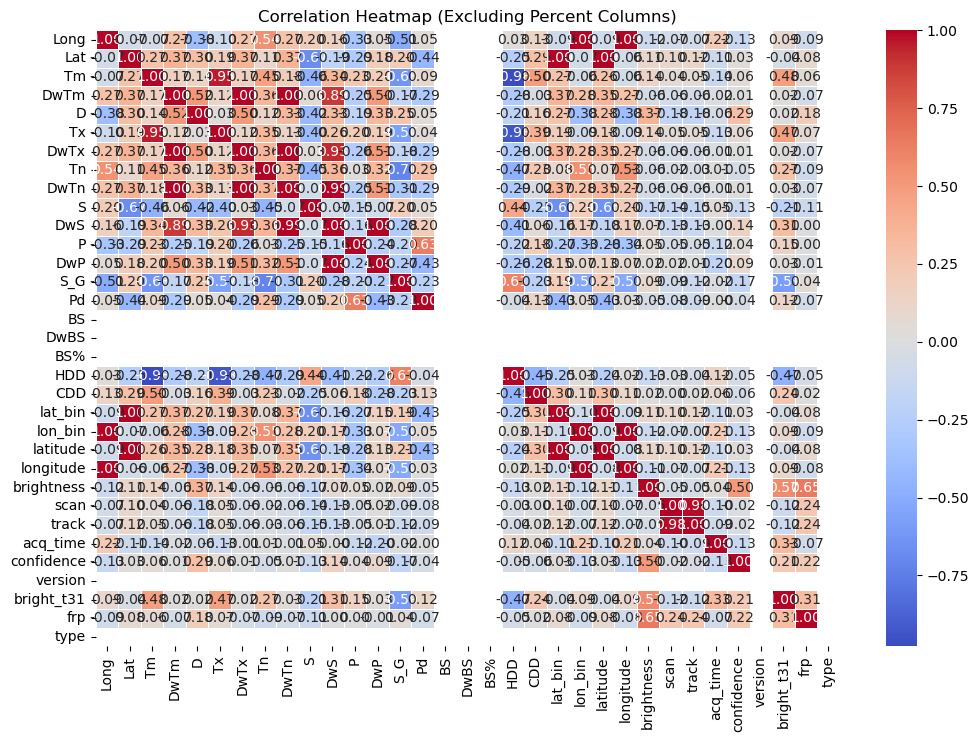

In [21]:
# List of columns to exclude
exclude_cols = ['S%N', 'P%N']

# Select numeric columns excluding the percentage columns
numeric_data = merged_df.select_dtypes(include=['float64', 'int64']).drop(columns=exclude_cols)

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Excluding Percent Columns)')
plt.show()



In [28]:
corr_matrix

,Long,Lat,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,...,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
Long,1.000000,-0.068116,-0.065859,0.267930,-0.384268,-0.098927,0.268009,0.543132,0.271753,0.200045,...,0.997569,-0.119673,-0.068064,-0.069129,0.217638,-0.134847,NaN,0.090158,-0.088303,NaN
Lat,-0.068116,1.000000,0.269787,0.370683,0.302943,0.185171,0.367890,0.111388,0.368493,-0.670008,...,-0.064998,0.107219,0.101533,0.118992,-0.111270,0.028651,NaN,-0.038636,0.076944,NaN
Tm,-0.065859,0.269787,1.000000,0.173207,0.139925,0.953802,0.173441,0.452004,0.183330,-0.462364,...,-0.058639,0.140331,0.044890,0.053867,-0.136107,0.055258,NaN,0.475001,0.063568,NaN
DwTm,0.267930,0.370683,0.173207,1.000000,0.515267,0.122380,0.999986,0.358219,0.998470,0.059752,...,0.270882,-0.059264,-0.063234,-0.057847,-0.015546,0.010693,NaN,0.023427,-0.065299,NaN
D,-0.384268,0.302943,0.139925,0.515267,1.000000,0.033032,0.504650,0.121523,0.330375,-0.415601,...,-0.382797,0.370751,-0.179878,-0.179801,-0.061947,0.291017,NaN,0.020164,0.184856,NaN
Tx,-0.098927,0.185171,0.953802,0.122380,0.033032,1.000000,0.121441,0.347763,0.130490,-0.400457,...,-0.087339,0.136284,0.046044,0.053111,-0.130513,0.061573,NaN,0.474522,0.066935,NaN
DwTx,0.268009,0.367890,0.173441,0.999986,0.504650,0.121441,1.000000,0.358637,0.998478,0.027126,...,0.270967,-0.059399,-0.064194,-0.058981,-0.014175,0.011226,NaN,0.024040,-0.065512,NaN
Tn,0.543132,0.111388,0.452004,0.358219,0.121523,0.347763,0.358637,1.000000,0.366125,-0.451745,...,0.532745,-0.055512,-0.023494,-0.025516,0.013651,-0.052248,NaN,0.268439,-0.091078,NaN
DwTn,0.271753,0.368493,0.183330,0.998470,0.330375,0.130490,0.998478,0.366125,1.000000,-0.066902,...,0.274689,-0.060969,-0.063185,-0.057934,-0.014886,0.012578,NaN,0.032079,-0.065492,NaN
S,0.200045,-0.670008,-0.462364,0.059752,-0.415601,-0.400457,0.027126,-0.451745,-0.066902,1.000000,...,0.198467,-0.168283,-0.144968,-0.154353,0.048746,-0.127020,NaN,-0.214253,-0.113177,NaN


Skipping pair (longitude, latitude) - column not found in DataFrame.
Skipping pair (scan, track) - column not found in DataFrame.
Skipping pair (brightness, frp) - column not found in DataFrame.


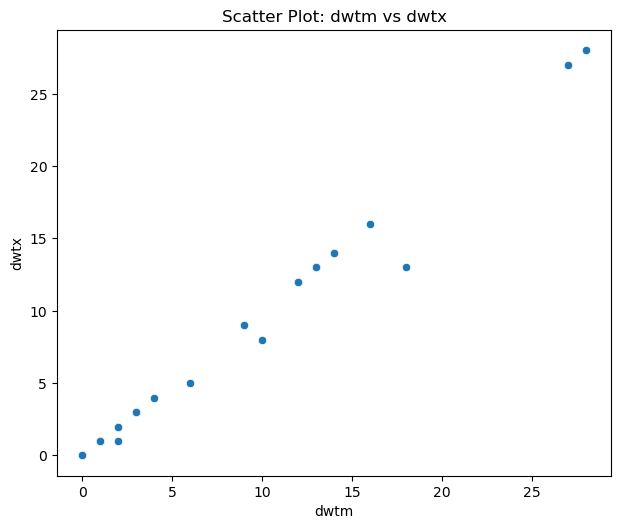

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Optional cleanup
df.columns = df.columns.str.strip().str.lower()

# Update pairs to match cleaned column names
high_corr_pairs = [
    ('longitude', 'latitude'),
    ('dwtm', 'dwtx'),
    ('scan', 'track'),
    ('brightness', 'frp')
]

plt.figure(figsize=(12, 10))

for i, (col1, col2) in enumerate(high_corr_pairs, 1):
    if col1 in df.columns and col2 in df.columns:
        plt.subplot(2, 2, i)
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
    else:
        print(f"Skipping pair ({col1}, {col2}) - column not found in DataFrame.")

plt.tight_layout()
plt.show()


## **Map visual**

In [6]:
import pandas as pd
import folium

# Load your dataset (replace with your actual file name)
# The CSV should have at least two columns: 'latitude' and 'longitude'
df = pd.read_csv("wildfires_alberta_only.csv")

# Create a base map centered at the average location
map_center = [df['latitude'].mean(), df['longitude'].mean()]
wildfire_map = folium.Map(location=map_center, zoom_start=6)

# Add each point to the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(wildfire_map)

# Save or display the map
wildfire_map.save("wildfire_map.html")
